<a href="https://colab.research.google.com/github/pavi-1994/Cardio_vascular_risk_prediction/blob/main/cardivascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

## Data description:

#### Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

#### Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

#### Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)


#### Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# to handle missing values
from sklearn.impute import KNNImputer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path="/content/drive/MyDrive/almabetter/module 4/capstone_project_3/data_cardiovascular_risk.csv"

### Importing

In [4]:
#importing data 
cardio_df=pd.read_csv(file_path)
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#print tail of dataframe
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#shape of data
cardio_df.shape

(3390, 17)

In [7]:
#printing the columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#using info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
#check the datatypes of columns present in the cardio_df
print(f'Feature datatype of cardio_df :\n\n {cardio_df.dtypes}')

Feature datatype of cardio_df :

 id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [10]:
#checking full information of data
cardio_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


### Missing values

In [11]:
#checking for null value 
print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2)}%')

Missing Data Count
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64%


### here we are observing prescence of missing value in percentage wise as we listed in descending order glucose, education, BPMeds, totChol, cigsPerDay, BMI, Heartrate. Handling the missing values are most important.

Before dealing with missing value we will convert categorical into numerical i.e by label encoding

In [12]:
# Replacing string categorical value with numerical value 0 or 1

cardio_df['sex'] = cardio_df['sex'].replace({'F':1,'M':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].replace({'YES':1,'NO':0})

### Missing value imputation using knn imputer

In [13]:
#here we use multivarient imputer to impute nan value
imputer = KNNImputer(n_neighbors=3)
cardio_df_imputed=imputer.fit_transform(cardio_df)


In [14]:
cardio_knn_imputed= pd.DataFrame(cardio_df_imputed,columns=cardio_df.columns)
cardio_knn_imputed.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,64.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.74,90.0,80.0,1.0
1,1.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2.0,46.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3.0,50.0,1.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4.0,64.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


checking after imputation of nan value using knn imputer

In [15]:
#checking for null value 
print('Missing Data Count')
print(cardio_knn_imputed.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_knn_imputed.isnull().sum().sort_values(ascending = False)/len(cardio_knn_imputed)*100,2)}%')

Missing Data Count
id                 0
diabetes           0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
prevalentHyp       0
age                0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
is_smoking         0
sex                0
education          0
TenYearCHD         0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
id                 0.0
diabetes           0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
prevalentHyp       0.0
age                0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
TenYearCHD         0.0
dtype: float64%


In [16]:
#check presence of duplicated rows
cardio_knn_imputed.duplicated().sum()

0

In [17]:
#check no of unique element present in each feature (columns)
cardio_knn_imputed.nunique()


id                 3390
age                  39
education            10
sex                   2
is_smoking            2
cigsPerDay           45
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             264
sysBP               226
diaBP               142
BMI                1270
heartRate            69
glucose             204
TenYearCHD            2
dtype: int64

### Knowing about target variable

**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [18]:
#value_count
cardio_knn_imputed["TenYearCHD"].value_counts()

0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64

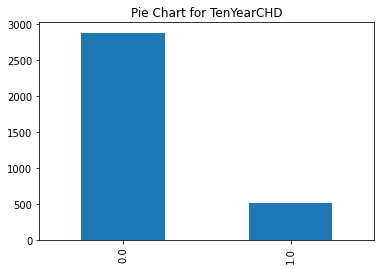

In [19]:
#To get the pie Plot to analyze TenYearCHD
cardio_knn_imputed["TenYearCHD"].value_counts().plot(kind="bar")
plt.title('Pie Chart for TenYearCHD')
plt.show()

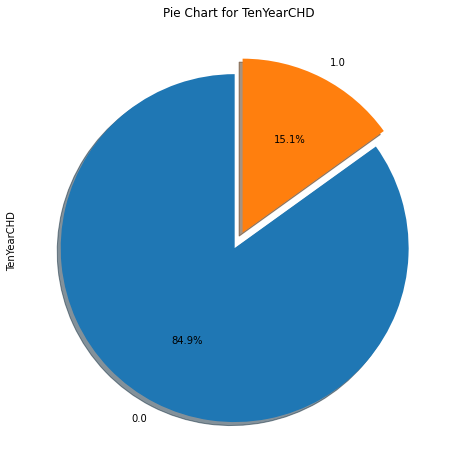

In [20]:
#To get the pie Plot to analyze seasons
cardio_knn_imputed["TenYearCHD"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for TenYearCHD')
plt.show()

From above analysis of target variabale "TenYearCHD" we observed that dataset is biased we need to carefully deal with biased dataset

In [21]:
### Univarient analysis  of continuous variables
cardio_numerics_col = cardio_knn_imputed.select_dtypes(include=np.number).columns.tolist()
print("numerical columns \n")
print(cardio_numerics_col)


numerical columns 

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']




### 1. Sex

In [22]:
cardio_knn_imputed["sex"].value_counts()

1.0    1923
0.0    1467
Name: sex, dtype: int64

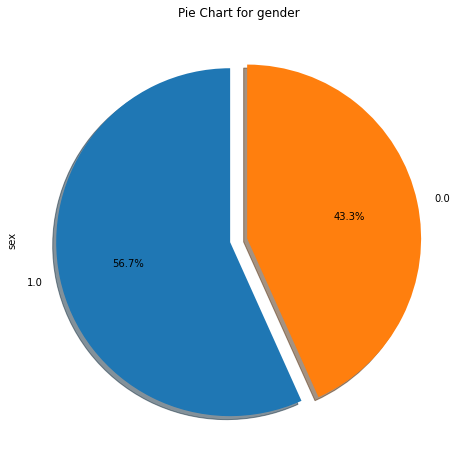

In [23]:
cardio_knn_imputed["sex"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for gender')
plt.show()

The dataset contain 43.3% of male data and remaining data belongs to female 

In [24]:
cardio_knn_imputed.groupby(["sex","TenYearCHD"])["TenYearCHD"].count()

sex  TenYearCHD
0.0  0.0           1195
     1.0            272
1.0  0.0           1684
     1.0            239
Name: TenYearCHD, dtype: int64

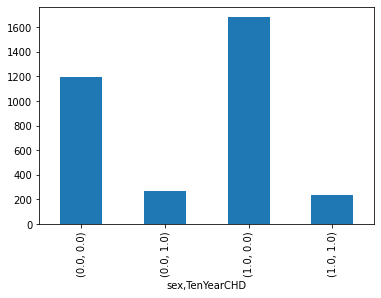

In [25]:
cardio_knn_imputed.groupby(["sex","TenYearCHD"])["TenYearCHD"].count().plot(kind='bar')

In cimparison with male female less likely  to get cardiovascular risk

### 2. 'is_smoking'

In [26]:
cardio_knn_imputed["is_smoking"].value_counts()

0.0    1703
1.0    1687
Name: is_smoking, dtype: int64

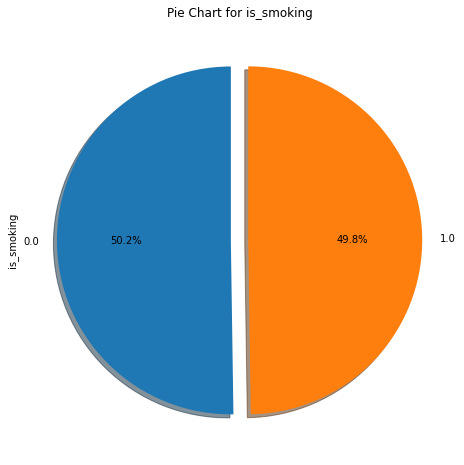

In [27]:
cardio_knn_imputed["is_smoking"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for is_smoking')
plt.show()

The data set contains almost same no of smokers and non smokers

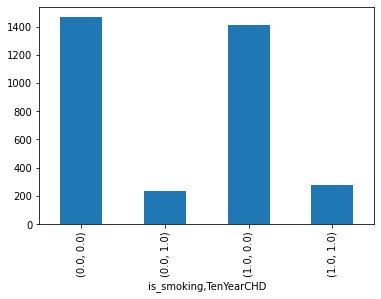

In [28]:
cardio_knn_imputed.groupby(["is_smoking","TenYearCHD"])["TenYearCHD"].count().plot(kind='bar')

### Based on studies the smokers are 2 to 4 times more likely to get heart disease than nonsmokers.


**Based on analysis cardiovascular risk dataset,we observed that the smoking slightly more  effective for cardiovascular risk then non smoker.**

In [29]:
cardio_knn_imputed.groupby(["sex","is_smoking","TenYearCHD"])["TenYearCHD"].count()

sex  is_smoking  TenYearCHD
0.0  0.0         0.0            467
                 1.0             89
     1.0         0.0            728
                 1.0            183
1.0  0.0         0.0           1000
                 1.0            147
     1.0         0.0            684
                 1.0             92
Name: TenYearCHD, dtype: int64

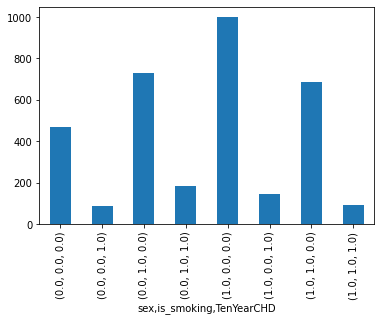

In [30]:
cardio_knn_imputed.groupby(["sex","is_smoking","TenYearCHD"])["TenYearCHD"].count().plot(kind='bar')

here we can observe that male who smoke has higher risk of having cardiovascular risk than female who smoke

In [31]:
# Dropping the id column
cardio_knn_imputed.drop(columns=['id'], inplace=True)